<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
data = pd.read_csv('DMV_Written_Tests.csv')
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

/tmp/ipython-input-169645580.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


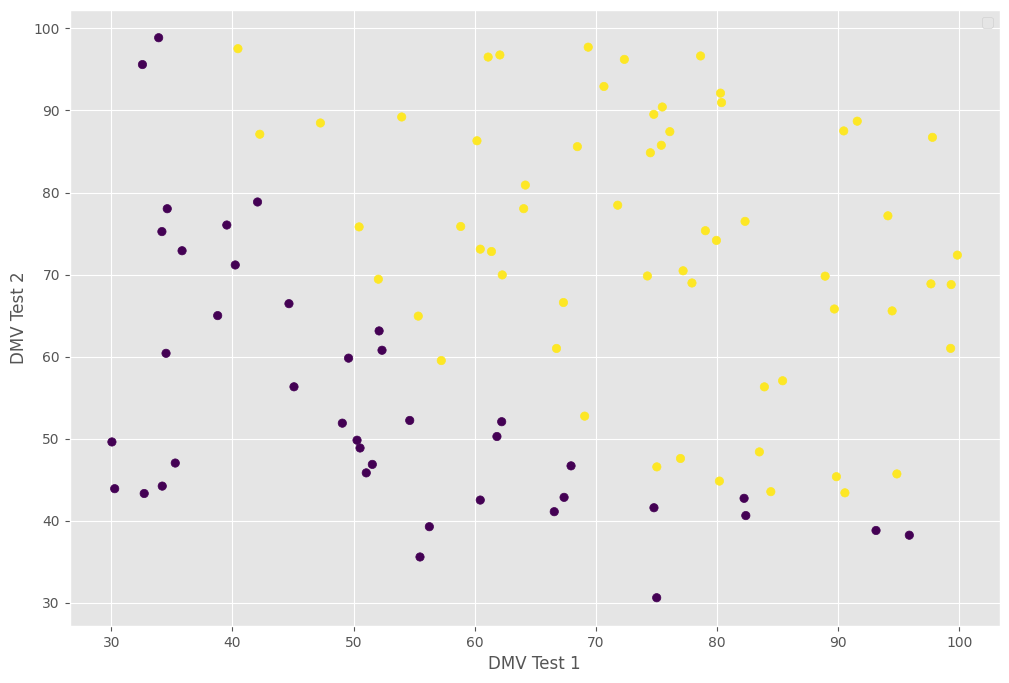

In [ ]:
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Results'])
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.legend()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
    din = 1.0 + np.exp(-z)
    return 1.0/din

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)})))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
def cost_function(X, y, W, Wo):
    m = len(y)
    h = sigmoid(W @ X + Wo)
    cost = -(1/m) * np.sum( y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient(X, y, W, Wo):
    m = len(y)
    h = sigmoid(X @ W + Wo)
    grad_W = (1/m) * (X.T @ (h - y))
    grad_Wo = (1/m) * np.sum(h - y)
    return grad_W, grad_Wo

### Task 6: Cost and Gradient at Initialization
---

In [ ]:
from re import X
# Initialize weights and bias to zeros
X = data[['DMV_Test_1', 'DMV_Test_2']].values.T
y = data['Results'].values

W = np.zeros(X.shape[0])
Wo = 0

cost = cost_function(X, y, W, Wo)
grad_W, grad_Wo = gradient(X, y, W, Wo)
print(cost)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 100)

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
def gradient_descent(X, y, W, Wo, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        grad_W, grad_Wo = gradient(X, y, W, Wo)
        W = W - alpha * grad_W
        Wo = Wo - alpha * grad_Wo
        cost = cost_function(X, y, W, Wo)
        cost_history.append(cost)

    return W, Wo, cost_history

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$